## Ejercicio 4
Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo

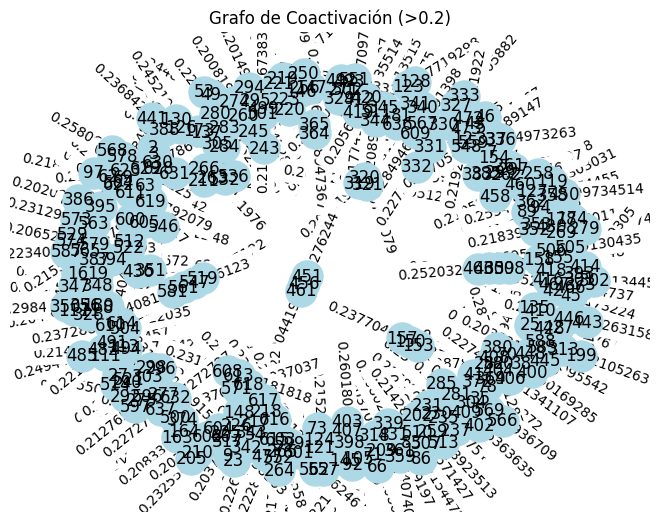

Nodos: [2, 3, 5, 12, 7, 154, 8, 11, 9, 23, 16, 19, 25, 428, 27, 290, 35, 304, 38, 70, 400, 41, 78, 42, 45, 416, 43, 46, 49, 53, 54, 217, 62, 69, 97, 63, 66, 71, 73, 124, 81, 636, 83, 86, 89, 94, 92, 105, 145, 111, 113, 117, 180, 119, 127, 121, 123, 128, 126, 130, 135, 410, 137, 173, 146, 147, 148, 226, 150, 153, 157, 155, 158, 163, 164, 174, 178, 199, 313, 202, 259, 205, 210, 209, 318, 211, 263, 218, 219, 221, 220, 223, 225, 317, 230, 231, 235, 237, 243, 245, 260, 250, 256, 258, 460, 513, 274, 261, 262, 266, 532, 264, 265, 269, 279, 271, 551, 275, 277, 292, 280, 283, 281, 285, 282, 580, 284, 305, 294, 295, 296, 298, 303, 297, 299, 301, 302, 308, 309, 465, 319, 320, 321, 327, 330, 333, 328, 356, 329, 502, 331, 332, 336, 337, 339, 431, 340, 341, 342, 343, 344, 345, 511, 347, 348, 350, 351, 436, 352, 353, 430, 358, 362, 450, 359, 361, 364, 365, 369, 372, 404, 373, 393, 374, 500, 380, 408, 383, 385, 386, 395, 387, 394, 388, 441, 414, 398, 407, 402, 409, 403, 406, 412, 419, 418, 420, 427, 4

In [13]:
import numpy as np
from scipy.io import loadmat
import networkx as nx
import matplotlib.pyplot as plt

data = loadmat('Coactivation_matrix.mat')

# Extraer la matriz de coactivación
matrix = data['Coactivation_matrix'] 

# matriz numpy
matrix = np.array(matrix)

# Filtrar los valores > 0.2
matrix_filtrada = np.where(matrix > 0.2, matrix, 0)

# Crear un grafo a partir de la matriz filtrada
graph = nx.Graph()

# Agregar nodos y vértices
for i in range(matrix_filtrada.shape[0]):  # Nodos (índices de filas)
    for j in range(i+1, matrix_filtrada.shape[1]):  # Nodos (índices de columnas)
        if matrix_filtrada[i, j] > 0:  # Si hay conexión
            graph.add_edge(i, j, weight=matrix_filtrada[i, j])

# Dibujar el grafo
pos = nx.spring_layout(graph)  # Disposición de los nodos
weights = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=weights)
plt.title("Grafo de Coactivación (>0.2)")
plt.show()

# Mostrar nodos y vértices
print("Nodos:", list(graph.nodes))
print("Vértices:", list(graph.edges))